# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

The most profitable item would be defined by the number of bottles sold times the profit made on the bottle (i.e. State Bottle Retail - State Bottle Cost). This gives you the total amount made for each item and accounts for differences in pricing between different items.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# load Iowa liquor data
iowa_liquor = pd.read_csv('data/iowa.csv')
iowa_liquor.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


<Axes: xlabel='Profit', ylabel='Item Description'>

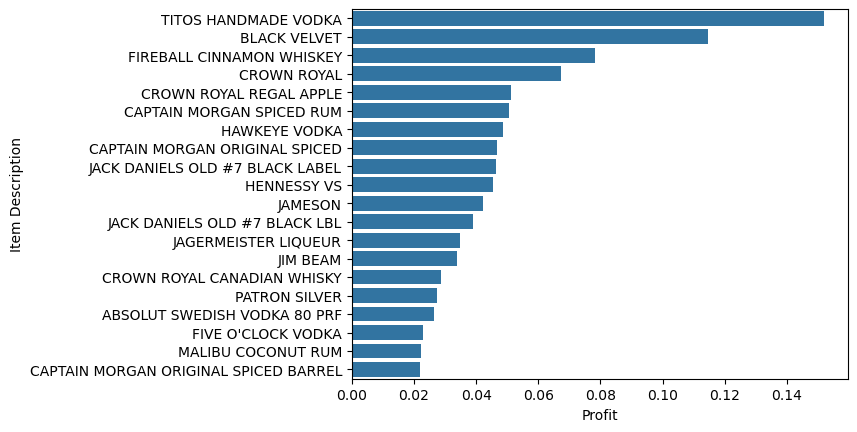

In [6]:
iowa_liquor['Profit'] = (iowa_liquor['State Bottle Retail'] - iowa_liquor['State Bottle Cost']) * iowa_liquor['Bottles Sold']

profit = iowa_liquor.loc[:, ['Profit', 'Item Description']].groupby('Item Description').sum().sort_values('Profit', ascending=False)
# profit.head()
top_profit = profit[:20]
sns.barplot(top_profit['Profit']/np.sum(top_profit['Profit']), orient='h')

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [7]:
# import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [10]:
x - y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

When attempting to subtract x and y, an error occurs since they are 2 different shapes.

In [ ]:
x.reshape(-1,1) - y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

The result is an array of shape (3,2) where the first column is the values of x minus the first value of y and the second column is the values of x minus the second value of y.

In [19]:
x.reshape(1, -1) - y.reshape(-1, 1)

array([[-1,  1,  3],
       [-4, -2,  0]])

The result is an array of shape (2,3) where the first row is the values of x minus the first value of y and the second row is the values of x minus the second value of y. This is the transpose of the previous result.

In [33]:
#x.reshape(-1,1) - y.reshape(1,-1)
z = np.empty((3,2), dtype=int)
for i in range(len(x)):
    for j in range(len(y)):
        z[i,j] = x[i] - y[j]
z

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [36]:
# x.reshape(1, -1) - y.reshape(-1, 1)
z = np.empty((2,3), dtype=int)
for i in range(len(x)):
    for j in range(len(y)):
        z[j,i] = x[i] - y[j]
z

array([[-1,  1,  3],
       [-4, -2,  0]])

Whereas x used to be a 1 dimensional vector, x.reshape(1, -1) and x.reshape(-1, 1) change x by making it 2 dimensional array with 1 row, 3 columns or 3 rows, 1 column, respectively.

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

<Axes: >

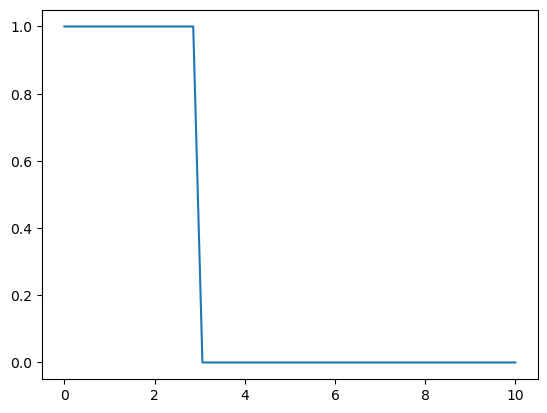

In [77]:
x = np.linspace(0,10)
y = x <= 3
sns.lineplot(x=x,y=y)


$ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$ because when $ \mathbb{I}\{ x \le z \} = 0 $, $ \mathbb{I}\{ x > z \} = 1 $ and when $ \mathbb{I}\{ x \le z \} = 1 $, $ \mathbb{I}\{ x > z \} = 0 $. By subtracting $ \mathbb{I}\{ x \le z \} $ from 1, it flips the signal so that it corresponds to $ \mathbb{I}\{ x > z \} $. In other words, when $ \mathbb{I}\{ x \le z \} = 1 $, we want the signal to be 0, and 1-1=0. When $ \mathbb{I}\{ x \le z \} = 0 $, we want the signal to be 1, and 1-0=1. Therfore, subtracting $ \mathbb{I}\{ x \le z \} $ from 1 makes it equal to $ \mathbb{I}\{ x > z \} $.

In [56]:
#ecdf function
# core of function taken from course notes
def ecdf(x, plot = True):
    # Compute ecdf function:
    Z = np.sort(np.unique(x)) # Extract and sort unique values for x
    compare = x.reshape(-1,1) <= Z.reshape(1,-1) # Compare x and Z values
    
    ecdf = np.mean(compare,axis=0) # Average over x indices for each z
    
    if plot:
        # Plot the ecdf:
        # title_str = x.name
        plt.plot(Z,ecdf)
        # plt.title(f'Empirical CDF: {title_str}')
        plt.ylabel('Proportion')
        # plt.xlabel(title_str)

    return ecdf, Z

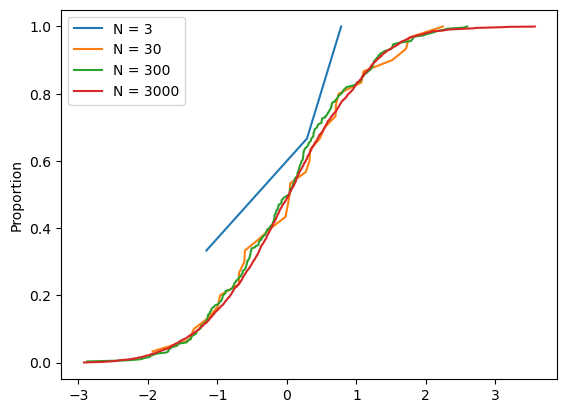

In [57]:
# import numpy as np
# import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    F_hat, grid = ecdf(X)
    
plt.legend(['N = 3', 'N = 30', 'N = 300', 'N = 3000'])
plt.show()

As N increases, the ECDF becomes much smoother. With only 3 observations, the distribution is cut short and doesn't resemble the curve at all. As the number of observations increases, the plot becomes more like the typical distribution curve. This is likely a result of the data becoming closer to a standard distribution with many observations.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [160]:
def compute_quantile(y, quant):
    sorted_y = np.sort(y)
    n = len(sorted_y)
    idx = quant * (n-1)
    # print(idx)

    if idx == int(idx):
        #idx is an int
        return sorted_y[int(idx)]
    else:
        #interpolate the value
        low_idx = int(idx)
        up_idx = low_idx+1

        low_val = sorted_y[low_idx]
        up_val = sorted_y[up_idx]

        return low_val + (up_val - low_val) * (idx - low_idx)

def compute_iqr(y):
    quant25 = compute_quantile(y, 0.25)
    quant75 = compute_quantile(y, 0.75)
    iqr = quant75 - quant25
    low_whisker = quant25 - (1.5*iqr)
    high_whisker = quant75 + (1.5*iqr)
    return iqr, low_whisker, high_whisker

def five_number_summary(y):
    minimum_val = y.min()
    quant25 = compute_quantile(y, 0.25)
    median = compute_quantile(y, 0.5)
    quant75 = compute_quantile(y, 0.75)
    maximum_val = y.max()
    iqr, low_whisker, high_whisker = compute_iqr(y)
    return minimum_val, quant25, median, quant75, maximum_val, low_whisker, high_whisker

def is_outlier(obs, y):
    iqr, low_whisker, high_whisker = compute_iqr(y)
    return [ob < low_whisker or ob > high_whisker for ob in obs]

In [86]:
iowa_liquor.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Zip Code',
       'Category Name', 'Vendor Name', 'Item Number', 'Item Description',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)', 'Profit'],
      dtype='object')

count    159904.000000
mean        869.592737
std         513.812818
min          20.000000
25%         750.000000
50%         750.000000
75%        1000.000000
max        6000.000000
Name: Bottle Volume (ml), dtype: float64

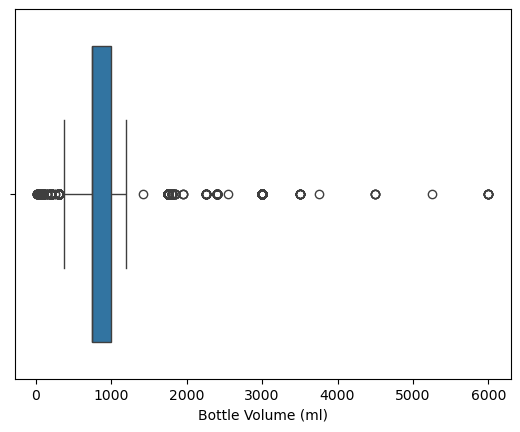

In [91]:
sns.boxplot(iowa_liquor['Bottle Volume (ml)'], orient='h')
iowa_liquor['Bottle Volume (ml)'].describe()

In [170]:
x = iowa_liquor['Bottle Volume (ml)']
print(five_number_summary(x))

print(x[is_outlier(x,x)])
print(is_outlier([300, 500, 1400, 6000], x))

(20, np.float64(750.0), np.float64(750.0), np.float64(1000.0), 6000, np.float64(375.0), np.float64(1375.0))
4          200
14        1750
15         200
17        1750
18        1750
          ... 
159890    1750
159891    1750
159896     200
159898    1750
159899    1750
Name: Bottle Volume (ml), Length: 47884, dtype: int64
[np.True_, np.False_, np.True_, np.True_]


5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

In [207]:
#bulk of code taken from course notes, added Epanechnikov, uniform, and triangular kernels and to rely on given h
def kde(x, kernel, h, plot = True):
    Z = np.sort(x.unique()).reshape(1,-1) # Extract unique values for x
    data = x.to_numpy().reshape(-1,1) # Reshape the data

    #h_s = 1.06 * np.std(x) * len(x)**(-0.2)
    # iqr = np.quantile(x,.75) - np.quantile(x,.25)
    # h_s = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
    # print(f'Bandwidth is: {h_s}')
    h_s = h
    if kernel == 'Gaussian':
        I = np.exp( -(data-Z)**2/(2*h_s**2) )/( np.sqrt(2*np.pi) * h_s) # Compute the kernel
    elif kernel == 'Epanechnikov':
        I = (3/4)*(1-((data-Z)**2/(h_s**2))) / h_s
    elif kernel == 'Uniform':
        I = (1/h_s) * (data-Z)/2
    elif kernel == 'Triangular':
        I = (1 - np.abs((data-Z/h_s))) / h_s
    kde = np.mean(I,axis=0) # Sum over x indices and normalize
    #kde = kde/np.sum(kde) # Normalize the kde so it sums to 1
    grid = Z.reshape(-1,1)
    
    # Plot KDE
    if plot:
        title_str = x.name
        plt.plot(grid,kde)
        plt.title(f'Density Estimate: {title_str}')
        plt.ylabel('Proportion')
        plt.xlabel(title_str)
    return kde, grid

def get_plug_in_bandwidth(x):
    iqr = np.quantile(x,.75) - np.quantile(x,.25)
    return 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)

In [175]:
df = pd.read_csv('data/metabric.csv')

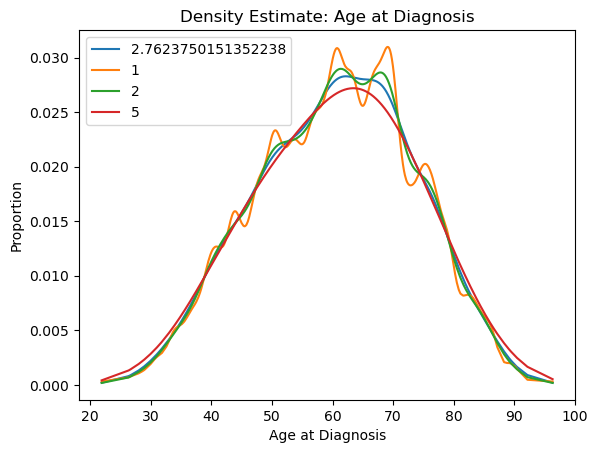

In [211]:
plug_in_h = get_plug_in_bandwidth(df['Age at Diagnosis'])
h_grid = [plug_in_h, 1, 2, 5]
for h in h_grid:
    kde(df['Age at Diagnosis'], 'Gaussian', h)
    
plt.legend(h_grid)    
plt.show()

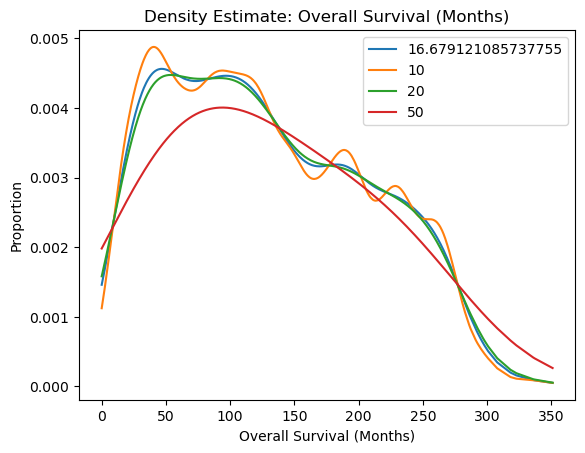

In [216]:
plug_in_h = get_plug_in_bandwidth(df['Overall Survival (Months)'])
h_grid = [plug_in_h, 10, 20, 50]
for h in h_grid:
    kde(df['Overall Survival (Months)'], 'Gaussian', h)
    
plt.legend(h_grid)    
plt.show()

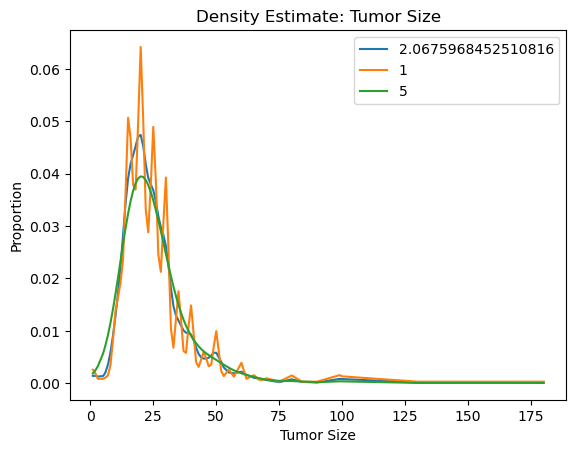

In [219]:
plug_in_h = get_plug_in_bandwidth(df['Tumor Size'])
h_grid = [plug_in_h, 1, 5]
for h in h_grid:
    kde(df['Tumor Size'], 'Gaussian', h)
    
plt.legend(h_grid)    
plt.show()

KDE appears to be overfitting when the bandwidth is set to a value lower than the plug in value and underfitting when it is set to a value higher than the plug in value.